In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from anyio.streams import file

In [3]:
conn = None
cursor = None

#establishing the connection
conn = psycopg2.connect(
    database="mydatabase", user="postgres", password="password", host="localhost", port= 5432
)

cursor = conn.cursor()
cursor.execute("select * from wealthmanager.dividendmaster")
result = cursor.fetchall()
df = pd.DataFrame.from_records(result, columns=[x[0] for x in cursor.description])
df["year"] = df["dividendyear"].astype(str)
temp = df[['year','dividendamount']]
temp = temp.groupby("year").sum("dividendamount")

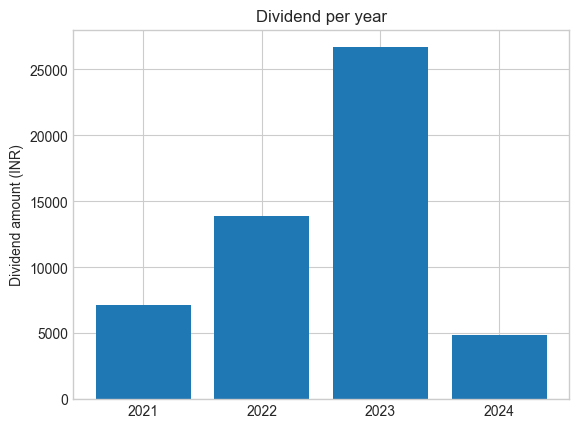

In [4]:
dividendByYear = temp['dividendamount'].to_dict()
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots()
ax.bar(dividendByYear.keys(), height = dividendByYear.values())
ax.set(title = "Dividend per year",
      ylabel= "Dividend amount (INR)")
plt.show()
plt.close()

In [ ]:
# see the different styles
plt.style.available